In [2]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd

In [12]:
# dummy data
# row 1 -> group 1 etc.
# col 1 -> proj 1 etc.
# 1 is top rank
raw_data = pd.read_csv\
("Example MAT210 Project Rank Form (Responses) - Form Responses 1.csv")

group_names = raw_data["Names of Group Members"]

loop = len(raw_data.columns)

d = pd.DataFrame({})

for i in range(3, loop):
    col_name = raw_data.columns[i]
    
    d[col_name] = raw_data[col_name]
    
matrix = np.array(d)

for i in range(len(matrix)):
    print(group_names[i] + str("'s rankings were: ") + str(matrix[i]))

Daniel, Nathan, Rachel's rankings were: [ 2  1  4  3  5  6  9  8  7 10 13 12 11 14 15]
daniel's rankings were: [ 1  3  2  5  4  7  6  9  8 11 10 13 12 15 14]
nate1's rankings were: [ 9  6  8  7 10 12 11 13 15  1  5  3  4 14  2]
dan's rankings were: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
nate2's rankings were: [15 11 14 10 13  9 12  8  1  3  5  7  6  4  2]
dan2's rankings were: [15  1 14  2 13  3 12  4 11  5 10  6  9  7  8]
nate3's rankings were: [ 1  3  5  7  9 11 13 15 14 12 10  8  6  4  2]
rachel2's rankings were: [ 3  2  4  5  7  6  8  9 11 10 12 14 13 15  1]
rachel3's rankings were: [ 1  3  4  2  5  6  9 10  7 11  8 12 13 15 14]
nate4's rankings were: [ 1  6 11  2  7 12  3  8 13  4  9 14  5 10 15]
dan3's rankings were: [ 6  5  4  3  2  1  7  8  9 10 11 15 14 13 12]
rachel4's rankings were: [15 14 13 10 11 12  1  9  8  7  4  5  6  3  2]


In [3]:
# Create a new model
m = gp.Model("mip1")

In [4]:
# Create variables

# assignment matrix
var = m.addVars(matrix.shape[0], matrix.shape[1], vtype=GRB.BINARY, name='G')

# rating matrix
dg = m.addVars(matrix.shape[0], matrix.shape[1], vtype=GRB.INTEGER, name='D')

In [5]:
for a in range(matrix.shape[0]):
    for b in range(matrix.shape[1]):
        dg[a,b] = matrix[a,b]*var[a,b]

# Add constraints
m.addConstrs((var.sum(i, '*') == 1
                 for i in range(matrix.shape[0])
                 for j in range(matrix.shape[1])), name='R');

m.addConstrs((var.sum('*', j) <= 1
                 for i in range(matrix.shape[0])
                 for j in range(matrix.shape[1])), name='C');

In [6]:
# Set objective
m.setObjective(dg.sum(), GRB.MINIMIZE)

In [7]:
# Optimize model
m.optimize()

Optimize a model with 360 rows, 360 columns and 4860 nonzeros
Variable types: 0 continuous, 360 integer (180 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 97.0000000
Presolve removed 333 rows and 180 columns
Presolve time: 0.01s
Presolved: 27 rows, 180 columns, 360 nonzeros
Variable types: 0 continuous, 180 integer (180 binary)

Root relaxation: objective 2.400000e+01, 27 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      24.0000000   24.00000  0.00%     -    0s

Explored 0 nodes (27 simplex iterations) in 0.03 seconds
Thread count was 6 (of 6 available processors)

Solution count 2: 24 97 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.400000000000e+01, best

In [8]:
m.write("model.lp")

# nSolutions = m.SolCount
# print('Number of solutions found: ' + str(nSolutions))

solution = m.getAttr("X", var)

sol_dict = {}

for i in range(matrix.shape[0]):
    sol = ''
    for j in range(matrix.shape[1]):
        if solution[i, j] > 0.5:
            sol += str(group_names[i]) +"'s group gets project " + str(j+1)
            sol_dict[i] = j
            
    print(sol)

Daniel, Nathan, Rachel's group gets project 2
daniel's group gets project 5
nate1's group gets project 10
dan's group gets project 3
nate2's group gets project 9
dan2's group gets project 8
nate3's group gets project 14
rachel2's group gets project 15
rachel3's group gets project 4
nate4's group gets project 1
dan3's group gets project 6
rachel4's group gets project 7


In [9]:
# Create a new model
m = gp.Model("mip1")

In [10]:
# Create variables

# assignment matrix
var = m.addVars(matrix.shape[0], matrix.shape[1], vtype=GRB.BINARY, name='G')

# rating matrix
dg = m.addVars(matrix.shape[0], matrix.shape[1], vtype=GRB.INTEGER, name='D')

In [11]:
for a in range(matrix.shape[0]):
    for b in range(matrix.shape[1]):
        dg[a,b] = matrix[a,b]*var[a,b]

# Add constraints
m.addConstrs((var.sum(i, '*') == 1
                 for i in range(matrix.shape[0])
                 for j in range(matrix.shape[1])), name='R');

m.addConstrs((var.sum('*', j) <= 1
                 for i in range(matrix.shape[0])
                 for j in range(matrix.shape[1])), name='C');

for i in sol_dict:
    j = sol_dict[i]
    m.addConstr((var.sum(i,j) == 0), name=str(i));

In [12]:
# Set objective
m.setObjective(dg.sum(), GRB.MINIMIZE)

In [13]:
# Optimize model
m.optimize()

Optimize a model with 372 rows, 360 columns and 4872 nonzeros
Variable types: 0 continuous, 360 integer (180 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 121.0000000
Presolve removed 345 rows and 192 columns
Presolve time: 0.00s
Presolved: 27 rows, 168 columns, 336 nonzeros
Variable types: 0 continuous, 168 integer (168 binary)

Root relaxation: objective 3.400000e+01, 30 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      34.0000000   34.00000  0.00%     -    0s

Explored 0 nodes (30 simplex iterations) in 0.03 seconds
Thread count was 6 (of 6 available processors)

Solution count 2: 34 121 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.400000000000e+01, be

In [14]:
m.write("model.lp")

# nSolutions = m.SolCount
# print('Number of solutions found: ' + str(nSolutions))

solution = m.getAttr("X", var)

sol_dict = {}

for i in range(matrix.shape[0]):
    sol = ''
    for j in range(matrix.shape[1]):
        if solution[i, j] > 0.5:
            sol += str(group_names[i]) +"'s group gets project " + str(j+1)
            sol_dict[i] = j
            
    print(sol)

Daniel, Nathan, Rachel's group gets project 4
daniel's group gets project 3
nate1's group gets project 12
dan's group gets project 1
nate2's group gets project 10
dan2's group gets project 6
nate3's group gets project 15
rachel2's group gets project 2
rachel3's group gets project 9
nate4's group gets project 7
dan3's group gets project 5
rachel4's group gets project 14


In [15]:
m.objVal

34.0

# Find solutions

In [4]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd

def find_sols(filename):
    # list of all the objective values for each solution
    solution_values = []
    
    # list of all found optimal solutions
    all_sols = []
    
    try:
        # row 1 -> group 1 etc.
        # col 1 -> proj 1 etc.
        # 1 is top ranked project
#         raw_data = pd.read_csv(filename)

#         group_names = raw_data["Names of Group Members"]

#         num_cols = len(raw_data.columns)

#         d = pd.DataFrame({})

#         # these are the data columns which contain the rankings
#         for i in range(3, num_cols):
#             col_name = raw_data.columns[i]

#             d[col_name] = raw_data[col_name]

        d = [[1,2,3],[1,2,3],[2,1,3]]

        matrix = np.array(d)

        # Create a new model
        m = gp.Model("mip1")
        
        # suppress output
        m.setParam("OutputFlag", 0)

        # assignment matrix
        var = m.addVars(matrix.shape[0], matrix.shape[1], vtype=GRB.BINARY, name='G')

        # rating matrix
        dg = m.addVars(matrix.shape[0], matrix.shape[1], vtype=GRB.INTEGER, name='D')

        # populate the gurobi matrix with our input data
        for a in range(matrix.shape[0]):
            for b in range(matrix.shape[1]):
                dg[a,b] = matrix[a,b]*var[a,b]

        # row constraint
        m.addConstrs((var.sum(i, '*') == 1
                         for i in range(matrix.shape[0])
                         for j in range(matrix.shape[1])), name='R');
        
        # column constraint
        m.addConstrs((var.sum('*', j) <= 1
                         for i in range(matrix.shape[0])
                         for j in range(matrix.shape[1])), name='C');

        # Set objective
        m.setObjective(dg.sum(), GRB.MINIMIZE);

        # Optimize model
        m.optimize();

        # keep track of solution
        solution_values.append(m.objVal)

        # look for other optimal solutions as long as the objective value
        # of those solutions are equal to the first-calculated optimal obj value
        while m.objVal == solution_values[0]:
            solution = m.getAttr("X", var)

            # keep track of the previous solution
            all_sols.append(solution)

            # keep track of the previous solution's objective value
            solution_values.append(m.objVal)

            # add constraint that previous solution can no longer be found
            for i in range(matrix.shape[0]):
                for j in range(matrix.shape[1]):
                    if solution[i, j] > 0.5:
                        m.addConstr((var.sum(i,j) == 0), name=str(i));

            # Set objective
            m.setObjective(dg.sum(), GRB.MINIMIZE);

            # Optimize model
            m.optimize();
            
            # break out if the model is no longer solvable
            if m.Status != 2:
                break
        
        # the first found solution has 2 copies of its objective value in this list,
        # so we delete the first
        del solution_values[0]
            
    except Exception as e:
        print(e)
        
    return all_sols, solution_values

In [5]:
all_sols, solution_values = find_sols\
("Example MAT210 Project Rank Form (Responses) - Form Responses 1.csv");

In [6]:
print(len(all_sols))
print(len(solution_values))
print(solution_values)

1
1
[5.0]


In [7]:
for k in range(len(all_sols)):
    for i in range(3):
        sol = ''
        for j in range(3):
            if all_sols[k][i, j] > 0.5:
                sol += str(group_names[i]) +"'s group gets project " + str(j+1)

        print(sol)

Daniel, Nathan, Rachel's group gets project 3
daniel's group gets project 1
nate1's group gets project 2


# Monte Carlo Simulation

In [14]:
%%capture

iterations = 10000

obj_vals = []

for i in range(iterations):
    arr = []

    for i in range(16):
        ratings = np.random.permutation(16) + 1
        arr.append(ratings)

    matrix = np.matrix(arr)
    
    # Create a new model
    m = gp.Model("mip1")
    
    # Create variables

    # assignment matrix
    var = m.addVars(matrix.shape[0], matrix.shape[1], vtype=GRB.BINARY, name='G')

    # rating matrix
    dg = m.addVars(matrix.shape[0], matrix.shape[1], vtype=GRB.INTEGER, name='D')
    
    for a in range(matrix.shape[0]):
        for b in range(matrix.shape[1]):
            dg[a,b] = matrix[a,b]*var[a,b]

    # Add constraints
    m.addConstrs((var.sum(i, '*') == 1
                     for i in range(matrix.shape[0])
                     for j in range(matrix.shape[1])), name='R');

    m.addConstrs((var.sum('*', j) <= 1
                     for i in range(matrix.shape[0])
                     for j in range(matrix.shape[1])), name='C');
    
    # Set objective
    m.setObjective(dg.sum(), GRB.MINIMIZE);
    
    # Optimize model
    m.optimize();
    
    obj_vals.append(m.objVal)

Mean of objective values: 27.26
Median of objective values: 27.00
Range of objective values: 23.00
Variance of objective values: 8.37


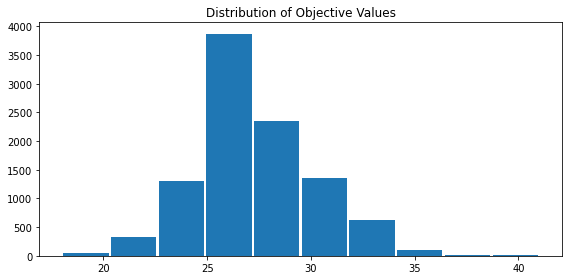

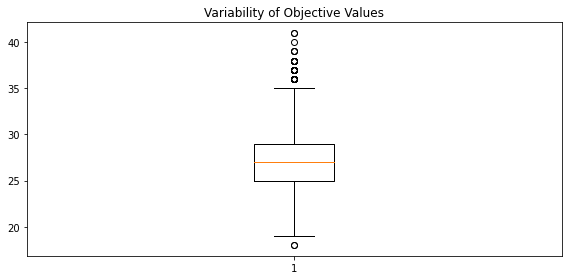

In [16]:
print("Mean of objective values: %.2f" % np.mean(obj_vals))
print("Median of objective values: %.2f" % np.median(obj_vals))
print("Range of objective values: %.2f" % np.ptp(obj_vals))
print("Variance of objective values: %.2f" % np.var(obj_vals))

from matplotlib import pyplot as plt 
fig, ax = plt.subplots(figsize =(8, 4), tight_layout = True) 
ax.hist(obj_vals, rwidth=0.95) 
plt.title("Distribution of Objective Values")
plt.show()

fig, ax = plt.subplots(figsize =(8, 4), tight_layout = True) 
ax.boxplot(obj_vals) 
plt.title("Variability of Objective Values")
plt.show()

# Write File

In [32]:
with open("output.txt", "w") as f:
    for k in range(len(all_sols)):
        f.write("***Solution #" + str(k+1) + " below has objective value " + \
                str(solution_values[k]) + ".***\n\n")
        for i in range(matrix.shape[0]):
            sol = ''
            for j in range(matrix.shape[1]):
                if all_sols[k][i, j] > 0.5:
                    sol += str(group_names[i]) +"'s group gets project " + str(j+1) + "\n"

            f.write(sol)
        f.write("\n-----------------------------------------------------------\n\n")